<a href="https://colab.research.google.com/github/erika-ld/Pairs-Trading-Repo-ED-VU-Fall-24-/blob/wip-victoria/pairs_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing** **Libraries**

In [62]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

# Adding Dates

In [63]:
# Set start date variable as start date for historical data (9/20/23)
start_date = dt.datetime(2023, 9, 20)
# Set end date variable as end date for historical data (9/20/24)
end_date = dt.datetime(2024, 9, 19)

# List of Stocks


In [67]:
# List of stocks(car companies):
# Telsa, BMW, Subaru, Porshe, Honda, Kia, Mzada, Toyota, Hyundai
stocks = ['TSLA', 'BMWKY', 'FUJHY', 'DRPRY', 'HMC', 'KS', 'MZDAY', 'TM', 'HYMTF', 'CHPT', 'EVGO', 'BLNK', 'WBX', 'SPWRQ']

# Download stock data INCLUDING ADJ Close price
stocks_df = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)

# Dropping everything, but ADJ close price
stocks_df.drop(columns = ['Open', 'High', 'Low','Close', 'Volume'], axis = 1, inplace = True)
# Cleaned dataframe by dropped unnecessary words
stocks_df = stocks_df.droplevel(0, axis = 1)

[*********************100%***********************]  14 of 14 completed


# Correlation Test

In [68]:

# Create a correlation matrix using panda's corr() method with the Pearson correlation method
correlation_matrix = stocks_df.corr(method='pearson')

# Iterate through the columns and replace the diagonal values (correlation = 1) with 0 in order to get the actual max correlation values
np.fill_diagonal(correlation_matrix.values, 0)
display(correlation_matrix)


Ticker,BLNK,BMWKY,CHPT,DRPRY,EVGO,FUJHY,HMC,HYMTF,KS,MZDAY,SPWRQ,TM,TSLA,WBX
Ticker,,,,,,,,,,,,,,
BLNK,0.000000,0.395138,0.347931,0.326005,-0.102577,0.153154,0.015999,-0.291050,0.287046,0.385221,0.575412,0.111323,0.262464,0.338972
BMWKY,0.395138,0.000000,-0.081915,0.631267,-0.497246,0.694368,0.681120,0.002267,0.661476,0.711786,0.303075,0.789533,-0.382276,0.098996
CHPT,0.347931,-0.081915,0.000000,0.376783,0.216505,-0.285234,-0.007980,-0.644952,-0.114233,0.260475,0.701413,-0.394177,0.576836,0.841363
DRPRY,0.326005,0.631267,0.376783,0.000000,-0.385489,0.275337,0.588564,-0.429766,0.465526,0.693794,0.567421,0.414097,-0.105639,0.384705
EVGO,-0.102577,-0.497246,0.216505,-0.385489,0.000000,-0.624325,-0.476078,0.087412,-0.500700,-0.566076,-0.267318,-0.597609,0.671817,0.140203
FUJHY,0.153154,0.694368,-0.285234,0.275337,-0.624325,0.000000,0.802309,0.431673,0.369403,0.485540,-0.034350,0.905871,-0.617797,-0.238057
HMC,0.015999,0.681120,-0.007980,0.588564,-0.476078,0.802309,0.000000,0.228785,0.270014,0.588994,0.066425,0.842074,-0.542369,0.004387
HYMTF,-0.291050,0.002267,-0.644952,-0.429766,0.087412,0.431673,0.228785,0.000000,-0.166198,-0.480193,-0.804478,0.415741,-0.450905,-0.648529
KS,0.287046,0.661476,-0.114233,0.465526,-0.500700,0.369403,0.270014,-0.166198,0.000000,0.481994,0.333755,0.438802,-0.312699,0.144933


### Correlation Heat Matrix

<Axes: xlabel='Ticker', ylabel='Ticker'>

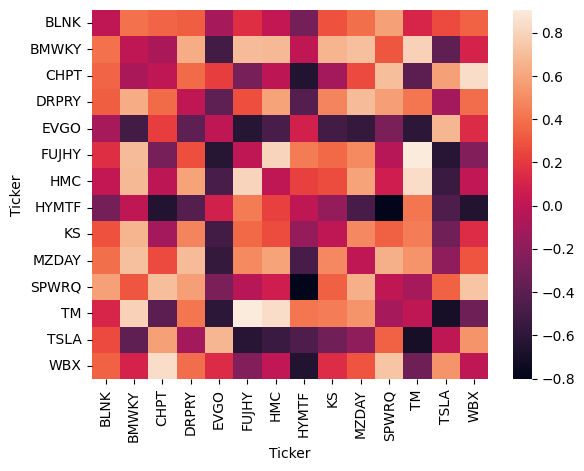

In [69]:
# Displaying correlation_matrix and interate through
display(sns.heatmap(correlation_matrix))

# Chose Stocks Toyota(TM) & Subaru(FUJHY)

In [71]:
# Dropped all data besides Toyota and Subaru at colums
tmsub_df = stocks_df.drop(columns = ['BLNK', 'BMWKY', 'CHPT', 'DRPRY', 'EVGO', 'HMC', 'HYMTF', 'KS', 'MZDAY', 'SPWRQ','TSLA', 'WBX'], axis = 1)
display(tmsub_df)


Ticker,FUJHY,TM
Date,,
2023-09-20,10.16,188.750000
2023-09-21,9.97,186.300003
2023-09-22,10.02,187.100006
2023-09-25,9.88,184.839996
2023-09-26,9.81,180.500000
...,...,...
2024-09-12,8.61,176.179993
2024-09-13,8.52,175.389999
2024-09-16,8.62,176.229996


# Cointergration Test

### Converting to Natural Logarthimic Price

In [72]:
tmsub_df = np.log(tmsub_df)
display(tmsub_df)

Ticker,FUJHY,TM
Date,,
2023-09-20,2.318458,5.240423
2023-09-21,2.299581,5.227358
2023-09-22,2.304583,5.231643
2023-09-25,2.290513,5.219491
2023-09-26,2.283402,5.195731
...,...,...
2024-09-12,2.152924,5.171506
2024-09-13,2.142416,5.167012
2024-09-16,2.154085,5.171790


### Implementing Ordinary Least Squares

Scatterplot TM vs FUJHY using TM as dependent variable

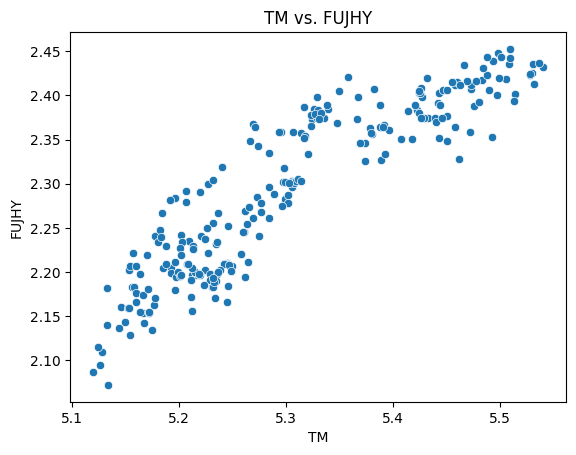

In [75]:
plt.figure()
sns.scatterplot(data=tmsub_df, x='TM', y='FUJHY')
plt.title('TM vs. FUJHY')
plt.xlabel('TM')
plt.ylabel('FUJHY')
plt.show()

### Results

In [108]:
Y = tmsub_df['TM']
X = tmsub_df['FUJHY']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     TM   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1184.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.36e-96
Time:                        02:20:38   Log-Likelihood:                 406.43
No. Observations:                 251   AIC:                            -808.9
Df Residuals:                     249   BIC:                            -801.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7947      0.073     38.268      0.0

### Component-Component plus Residual Plot

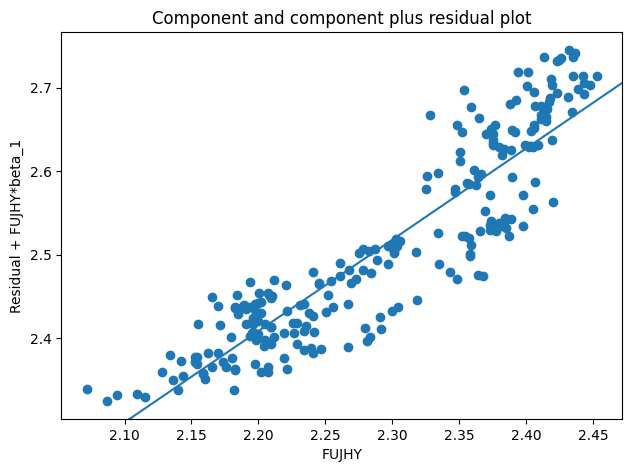

In [94]:
# Plot showing OLS results using Component-Component plus Residual (CCPR) Plots
result_plot = sm.graphics.plot_ccpr(result,'FUJHY')
# Tight layout makes plot readable
result_plot.tight_layout(pad=1.0)

### Implementing Augmented Dicky-Fuller Test